In [70]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
from glob import glob
import cv2

In [71]:
path=pathlib.Path(r"C:\Users\User\Downloads\eye cancer")

In [72]:
eyeproblem=["cataract","diabetic_retinopathy","glaucoma","normal"]

In [73]:
x=[]
y=[]
for i in eyeproblem:
    i_path=path.glob(str(i)+'\*.jpg')
    ind=eyeproblem.index(i)
    for j in i_path:
        img=cv2.imread(str(j))
        # normalizedImg = np.zeros((800, 800))
        # normalizedImg = cv2.normalize(img,  normalizedImg, 0, 255, cv2.NORM_MINMAX)
    # cv2.imshow('dst_rt', normalizedImg)
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()
        img=cv2.resize(img,(150,150))
        # img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        img=img/255
        x.append(img)
        y.append(ind)

In [74]:
x=np.array(x)
y=np.array(y)

In [75]:
(x.shape),(y.shape)

((2918, 150, 150, 3), (2918,))

In [76]:
len(x),len(y)

(2918, 2918)

In [77]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=.8,random_state=1)

In [78]:
len(xtrain),len(xtest)

(2334, 584)

In [79]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [80]:
model=Sequential()
model.add(Conv2D(filters=100,input_shape=(150,150,3),kernel_size=(3,3),activation="relu",strides=1,padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

# model.add(Conv2D(filters=250,kernel_size=(3,3),activation='relu',strides=1,padding='same'))
# model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(200,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='softmax'))

In [81]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 150, 150, 100)     2800      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 75, 75, 100)      0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 562500)            0         
                                                                 
 dense_6 (Dense)             (None, 200)               112500200 
                                                                 
 dense_7 (Dense)             (None, 30)                6030      
                                                                 
 dense_8 (Dense)             (None, 15)                465       
                                                      

In [82]:
model.compile(loss=SparseCategoricalCrossentropy(),optimizer=Adam(),metrics=["accuracy"])

In [83]:
hist=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=15,batch_size=50)

Epoch 1/15
47/47 [==============================] - 88s 2s/step - loss: 3.4260 - accuracy: 0.4563 - val_loss: 0.8883 - val_accuracy: 0.5873
Epoch 2/15
47/47 [==============================] - 74s 2s/step - loss: 0.8019 - accuracy: 0.6512 - val_loss: 0.7942 - val_accuracy: 0.6507
Epoch 3/15
47/47 [==============================] - 78s 2s/step - loss: 0.6925 - accuracy: 0.7121 - val_loss: 0.7195 - val_accuracy: 0.7003
Epoch 4/15
47/47 [==============================] - 74s 2s/step - loss: 0.6338 - accuracy: 0.7408 - val_loss: 0.8042 - val_accuracy: 0.6695
Epoch 5/15
47/47 [==============================] - 75s 2s/step - loss: 0.5960 - accuracy: 0.7528 - val_loss: 0.7059 - val_accuracy: 0.7277
Epoch 6/15
47/47 [==============================] - 74s 2s/step - loss: 0.5907 - accuracy: 0.7528 - val_loss: 0.7199 - val_accuracy: 0.7072
Epoch 7/15
47/47 [==============================] - 75s 2s/step - loss: 0.5358 - accuracy: 0.7849 - val_loss: 0.7076 - val_accuracy: 0.7106
Epoch 8/15
47/47 [==

In [84]:
# from tensorflow.keras.layers import RandomFlip
# from tensorflow.keras.layers import RandomRotation
# from tensorflow.keras.layers import RandomZoom
# from tensorflow import keras
# from tensorflow.keras import layers
# from tensorflow.keras.models import Sequential

In [85]:
# data_augmentation = keras.Sequential(
#   [
#     layers.RandomFlip("horizontal",
#                       input_shape=(150,
#                                   150,
#                                   3)),
#     layers.RandomRotation(0.1),
#     layers.RandomZoom(0.1),
#   ]
# )

In [86]:
# from tensorflow.keras.layers import Dropout

In [87]:
# model = Sequential([
#   data_augmentation,
#   # layers.Rescaling(1./255),
#   layers.Conv2D(100, (3,3), padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(50, (3,3), padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   # layers.Conv2D(64, (3,3), padding='same', activation='relu'),
#   # layers.MaxPooling2D(),
#   layers.Dropout(0.7),
#   layers.Flatten(),
#   layers.Dense(128, activation='relu'),
#   layers.Dense(15, name="outputs")])

In [88]:
# import tensorflow as tf
# model.compile(optimizer='adam',
#               loss='SparseCategoricalCrossentropy',
#               metrics=['accuracy'])

In [89]:
# model.summary()

In [90]:
history=hist.history

In [91]:
history

{'loss': [3.425954580307007,
  0.8019195199012756,
  0.6924508810043335,
  0.6338163614273071,
  0.5959502458572388,
  0.5907279253005981,
  0.5357866287231445,
  0.4952123761177063,
  0.5110649466514587,
  0.4330712854862213,
  0.40635865926742554,
  0.38056668639183044,
  0.3819141685962677,
  0.38491690158843994,
  0.34761789441108704],
 'accuracy': [0.45629820227622986,
  0.6512424945831299,
  0.7120822668075562,
  0.7407883405685425,
  0.7527849078178406,
  0.7527849078178406,
  0.7849186062812805,
  0.8003427386283875,
  0.7990574240684509,
  0.8341902494430542,
  0.837617814540863,
  0.8551842570304871,
  0.8530420064926147,
  0.8457583785057068,
  0.8723222017288208],
 'val_loss': [0.888251543045044,
  0.7942400574684143,
  0.7194856405258179,
  0.8041805028915405,
  0.7059171199798584,
  0.7199392318725586,
  0.7076026201248169,
  0.7742850184440613,
  0.6852338314056396,
  0.675987184047699,
  0.7282384037971497,
  0.7285169959068298,
  0.6845658421516418,
  0.814735710620880

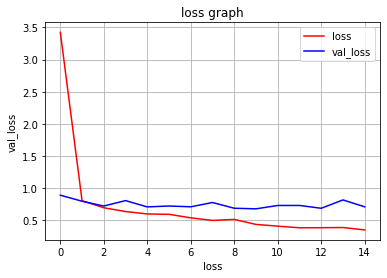

In [92]:
plt.plot(history["loss"],label="loss",color="r")
plt.plot(history["val_loss"],label="val_loss",color="b")
plt.title("loss graph")
plt.xlabel("loss")
plt.ylabel("val_loss")
plt.legend()
plt.grid()


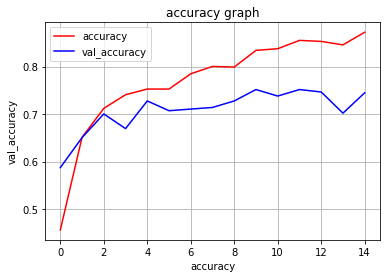

In [93]:
plt.plot(history["accuracy"],label="accuracy",color="r")
plt.plot(history["val_accuracy"],label="val_accuracy",color="b")
plt.title("accuracy graph")
plt.xlabel("accuracy")
plt.ylabel("val_accuracy")
plt.legend()
plt.grid()


In [94]:
model.save("MAIN EYE PROJECT.h5")

In [95]:
from sklearn.metrics import confusion_matrix
y_act=ytest
y_predict=np.argmax(model.predict(xtest),axis=1)

19/19 [==============================] - 5s 240ms/step


In [96]:
cm=confusion_matrix(ytest,y_predict)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

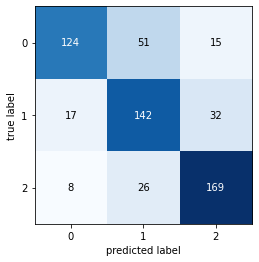

In [97]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(cm)

In [98]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.models import load_model


In [99]:
model=load_model("MAIN EYE PROJECT.H5")


In [100]:
labels={"cataract":0,"diabetic_retinopathy":1,"glaucoma":2,"normal":3}

In [101]:
def predict(img_path):
    img=load_img(str(img_path),target_size=(150,150))
    plt.imshow(img)
    img=img_to_array(img)
    img=img/255
    img=img.reshape(1,150,150,3)
    result=model.predict(img)
    for i in labels:
        if(np.argmax(result)==labels[i]):
            print(i)

1/1 [==============================] - 0s 102ms/step
glaucoma


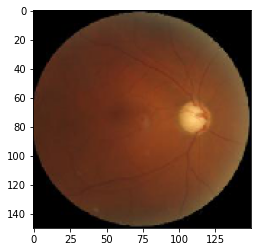

In [103]:
predict(r"C:\Users\User\Downloads\eye cancer\glaucoma\_14_3746939.jpg")

1/1 [==============================] - 0s 112ms/step
glaucoma


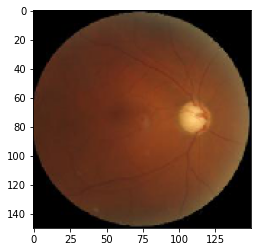

In [104]:
predict(r"C:\Users\User\Downloads\eye cancer\glaucoma\_14_3746939.jpg")